In [3]:
import pandas as pd
apple = pd.read_csv('apple_quality.csv')
apple.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [54]:
import numpy as np
sweetness = np.array(apple.Sweetness)
#print(sweetness)
juiciness1 = np.array(apple.Juiciness)
juiciness = juiciness1+10
#print(juiciness)
acidity = np.array(apple.Acidity)
ripeness = np.array(apple.Ripeness)


Here I choose sweetness in my step 1.

In [31]:
import pymc as pm
with pm.Model() as sweetness_model:
    # Prior for mean and precision (inverse variance)
    mu = pm.Normal('mu', mu=0, sigma=10)
    precision = pm.Gamma('precision', alpha=1, beta=1)

    # Likelihood
    swt_obs = pm.Normal('swt_obs', mu=mu, sigma=precision**-0.5, observed=sweetness)

    # Sample
    trace_swt = pm.sample(2000, tune=1000)

pm.summary(trace_swt)

/usr/local/lib/python3.10/dist-packages/pymc/model.py:1363: ImputationWarning: Data in swt_obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,-0.469,0.032,-0.526,-0.408,0.000,0.000,6161.0,3258.0,1.0
swt_obs_unobserved[0],-0.452,1.952,-4.362,2.993,0.022,0.032,7969.0,3246.0,1.0
precision,0.265,0.006,0.254,0.276,0.000,0.000,5771.0,3097.0,1.0
swt_obs[0],5.346,0.000,5.346,5.346,0.000,0.000,4000.0,4000.0,NaN
swt_obs[1],3.664,0.000,3.664,3.664,0.000,0.000,4000.0,4000.0,NaN
...,...,...,...,...,...,...,...,...,...
swt_obs[3996],-0.204,0.000,-0.204,-0.204,0.000,0.000,4000.0,4000.0,NaN
swt_obs[3997],-2.440,0.000,-2.440,-2.440,0.000,0.000,4000.0,4000.0,NaN
swt_obs[3998],2.366,0.000,2.366,2.366,0.000,0.000,4000.0,4000.0,NaN
swt_obs[3999],0.121,0.000,0.121,0.121,0.000,0.000,4000.0,4000.0,NaN


here I choose juiciness for step 2.

In [56]:
with pm.Model() as juiciness_model:
    # Prior for shape and scale parameters of the Gamma distribution
    shape = pm.HalfNormal('shape', sigma=1)
    scale = pm.HalfNormal('scale', sigma=1)

        # Likelihood
    juiciness_obs = pm.Gamma('juiciness_obs', alpha=shape, beta=scale, observed=juiciness)

      # Sample
    trace_juc = pm.sample(2000, tune=2000)

# Posterior summary
pm.summary(trace_juc)


/usr/local/lib/python3.10/dist-packages/pymc/model.py:1363: ImputationWarning: Data in juiciness_obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
shape,21.438,0.418,20.654,22.215,0.014,0.010,944.0,1298.0,1.0
scale,0.491,0.010,0.473,0.510,0.000,0.000,935.0,1198.0,1.0
juiciness_obs_unobserved[0],43.456,9.374,27.209,61.836,0.217,0.154,1840.0,1660.0,1.0
juiciness_obs[0],11.845,0.000,11.845,11.845,0.000,0.000,4000.0,4000.0,NaN
juiciness_obs[1],10.853,0.000,10.853,10.853,0.000,0.000,4000.0,4000.0,NaN
...,...,...,...,...,...,...,...,...,...
juiciness_obs[3996],10.025,0.000,10.025,10.025,0.000,0.000,4000.0,4000.0,NaN
juiciness_obs[3997],12.200,0.000,12.200,12.200,0.000,0.000,4000.0,4000.0,NaN
juiciness_obs[3998],12.161,0.000,12.161,12.161,0.000,0.000,4000.0,4000.0,NaN
juiciness_obs[3999],11.267,0.000,11.267,11.267,0.000,0.000,4000.0,4000.0,NaN


In [53]:
juiciness_model.debug()


point={'shape_log__': array(0.), 'scale_log__': array(0.), 'sweetness_obs_unobserved_log__': array([0.])}

The variable sweetness_obs_observed has the following parameters:
0: Exp [id A] <Scalar(float64, shape=())> 'shape'
 └─ shape_log__ [id B] <Scalar(float64, shape=())>
1: Exp [id C] <Scalar(float64, shape=())> 'scale'
 └─ scale_log__ [id D] <Scalar(float64, shape=())>
The parameters evaluate to:
0: 1.0
1: 1.0
Some of the observed values of variable sweetness_obs_observed are associated with a non-finite logp:
 value = -0.8017662410000002 -> logp = -inf
 value = -0.7134313380000004 -> logp = -inf
 value = -0.8143076149999997 -> logp = -inf
 value = -0.26163610900000034 -> logp = -inf
 value = -0.961897048 -> logp = -inf
 value = -0.647512538 -> logp = -inf
 value = -0.5440528560000004 -> logp = -inf
 value = -0.5511683319999996 -> logp = -inf
 value = -0.4522118639999997 -> logp = -inf
 value = -0.49866669299999966 -> logp = -inf
 value = -0.3143080170000001 -> logp = -inf
 value = 

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


                               mean     sd  hdi_3%  hdi_97%  mcse_mean  \
shape                        21.438  0.418  20.654   22.215      0.014   
scale                         0.491  0.010   0.473    0.510      0.000   
juiciness_obs_unobserved[0]  43.456  9.374  27.209   61.836      0.217   
juiciness_obs[0]             11.845  0.000  11.845   11.845      0.000   
juiciness_obs[1]             10.853  0.000  10.853   10.853      0.000   
...                             ...    ...     ...      ...        ...   
juiciness_obs[3996]          10.025  0.000  10.025   10.025      0.000   
juiciness_obs[3997]          12.200  0.000  12.200   12.200      0.000   
juiciness_obs[3998]          12.161  0.000  12.161   12.161      0.000   
juiciness_obs[3999]          11.267  0.000  11.267   11.267      0.000   
juiciness_obs[4000]          43.456  9.374  27.209   61.836      0.217   

                             mcse_sd  ess_bulk  ess_tail  r_hat  
shape                          0.010     944.

/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:487: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


KeyboardInterrupt: 

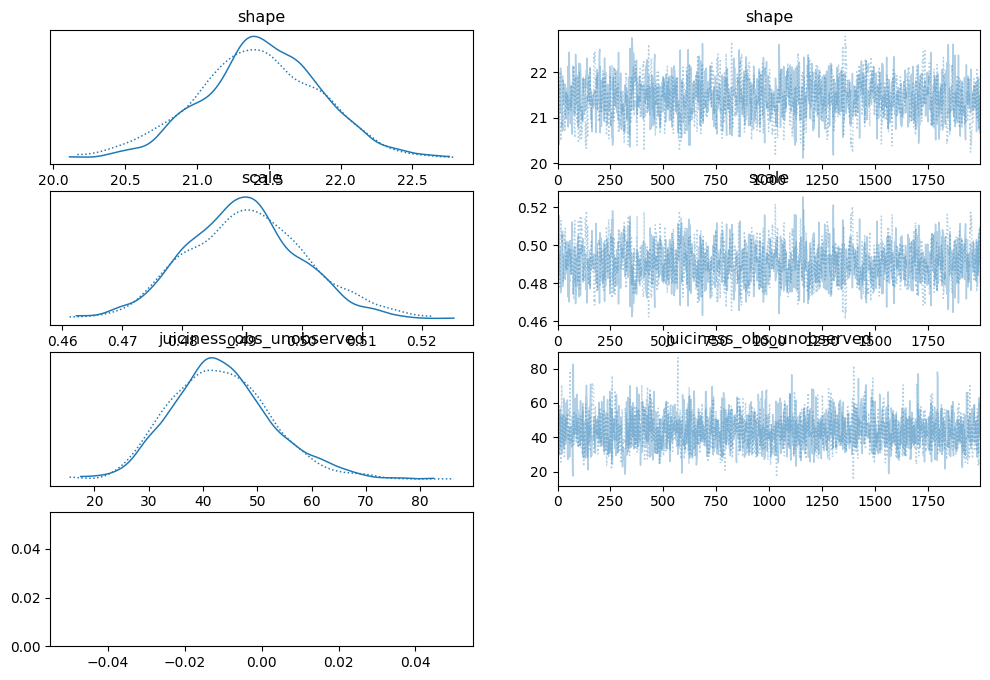

In [60]:
import matplotlib.pyplot as plt

# Posterior summary
summary_juc = pm.summary(trace_juc)
print(summary_juc)

# Plot trace and posterior distribution
pm.plot_trace(trace_juc)
plt.show()